In [1]:
import pandas as pd
#import pandas_ml as pdml
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from modules import gbvoid_dataset as gbvoid
from modules import LDA_Model as LDA_model

In [2]:
# DATA

inputs = ['1_001', '1_002', '1_003', '1_004', '1_005', '1_006', '1_007', '1_008', '1_009', '1_010',
          '2_001', '2_002', '2_003', '2_004', '2_005', '2_006', '2_007', '2_008', '2_009',
          '3_001', '3_002', '3_003', '3_004', '3_005', '3_006', '3_007', '3_008', '3_009', '3_010',
          '4_001', '4_002', '4_003', '4_004', '4_005', '4_007', '4_008', '4_009',
          '5_001', '5_002', '5_003', '5_004', '5_005', '5_006', '5_007', '5_008', '5_009', '5_010', '5_011',
          '6_001', '6_002', '6_003', '6_004', '6_005', '6_006', '6_007', '6_008', '6_009']

columns_void=['phi1_right','PHI_right','phi2_right','phi1_left','PHI_left','phi2_left',
         'Misorientation Angle','Mis. X in Right Hand Grain','Mis. Y in Right Hand Grain', 'Mis. Z in Right Hand Grain',
         'Mis. X in Right Hand Grain','Mis. Y in Right Hand Grain','Mis. Z in Right Hand Grain',
         'Lenght','Trace', 'X start', 'Y start', 'X end','Y end','ID Right Grain', 'ID Left Grain', 'Void']

columns_drop=['ID Right Grain','ID Left Grain']

# Collect all txt data
data=[]
for name in inputs:
    void_dataset_temp = gbvoid.gbvoid_dataset(name)
    data.append(void_dataset_temp)
void_dataset=pd.concat(data, ignore_index='True')
void_dataset.columns=columns_void

# Drop ID grain form the dataset
void_dataset=void_dataset.drop(columns_drop, axis=1)

In [80]:
X = void_dataset.iloc[:,:-1].values
Y = void_dataset.iloc[:,-1].values

In [81]:
X_dataset=pd.DataFrame(X)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(void_dataset.drop('Void', axis=1),void_dataset['Void'], test_size=0.10, random_state=0)
df_train=X_train
df_train['Void']=y_train

In [153]:
df_train

,phi1_right,PHI_right,phi2_right,phi1_left,PHI_left,phi2_left,Misorientation Angle,Mis. X in Right Hand Grain,Mis. Y in Right Hand Grain,Mis. Z in Right Hand Grain,Mis. X in Right Hand Grain,Mis. Y in Right Hand Grain,Mis. Z in Right Hand Grain,Lenght,Trace,X start,Y start,X end,Y end,Void
194073,3.961,0.429,2.912,2.820,0.744,3.931,38.19,4.0,-29.0,-1.0,4.0,-29.0,-1.0,6.000,120.0,22.0,167.43,25.0,172.63,0.0
1181,3.188,0.662,3.073,4.865,0.661,0.639,55.14,1.0,-15.0,-16.0,1.0,-15.0,-16.0,30.265,136.6,266.0,628.16,288.0,648.94,0.0
195512,0.878,0.761,4.829,3.868,0.772,2.193,32.05,5.0,-1.0,2.0,5.0,-1.0,2.0,18.903,17.8,366.0,1026.53,384.0,1020.76,0.0
44074,4.041,0.669,1.588,3.318,0.334,3.446,33.63,15.0,-19.0,18.0,15.0,-19.0,18.0,2.000,180.0,836.0,153.58,838.0,153.58,0.0
187507,3.239,0.485,3.431,3.808,0.657,1.927,37.20,12.0,11.0,-25.0,12.0,11.0,-25.0,23.065,4.3,309.0,799.63,332.0,797.90,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152315,1.806,0.215,4.496,6.180,0.670,5.673,55.66,5.0,-3.0,3.0,5.0,-3.0,3.0,9.866,95.8,512.0,635.09,513.0,644.90,0.0
176963,5.967,0.490,0.425,2.986,0.517,3.284,37.90,-14.0,-3.0,6.0,-14.0,-3.0,6.0,5.033,126.6,459.0,468.23,462.0,472.27,0.0
117952,0.118,0.704,6.248,4.333,0.550,1.721,53.33,-9.0,7.0,-5.0,-9.0,7.0,-5.0,23.692,147.6,982.0,383.36,1002.0,396.06,0.0
173685,1.974,0.250,4.023,1.697,0.708,4.440,28.57,4.0,-20.0,-7.0,4.0,-20.0,-7.0,35.005,0.9,2.0,468.81,37.0,468.23,0.0


Pairs
162221356.70501685
162221356.70501685
5060.211757630475
2.37374544885132
2.37374544885132
0.2080262068313836
0.20801653011757387
4.45464626177879e-05
2.787914071399218e-05
8.463730115797771e-07
8.463730115797771e-07
5.758273053482304e-07
2.398637256740675e-07
2.398637256740675e-07
2.1288908523241908e-07
3.417072890775469e-08
1.0492025109427765e-08
4.753900536527748e-09
2.845417015150392e-10
------------------
Explained Variance
Eigenvector 0: 2.324487373303503
Eigenvector 1: 2.324487373303503
Eigenvector 2: 7.250832181266182e-05
Eigenvector 3: 3.401365538647914e-08
Eigenvector 4: 3.401365538647914e-08
Eigenvector 5: 2.9808300270541367e-09
Eigenvector 6: 2.9806913683748933e-09
Eigenvector 7: 6.383110829770429e-13
Eigenvector 8: 3.9948322393867817e-13
Eigenvector 9: 1.2127770464277027e-14
Eigenvector 10: 1.2127770464277027e-14
Eigenvector 11: 8.25109176542812e-15
Eigenvector 12: 3.4370332795130795e-15
Eigenvector 13: 3.4370332795130795e-15
Eigenvector 14: 3.0505107378477956e-15
Eig

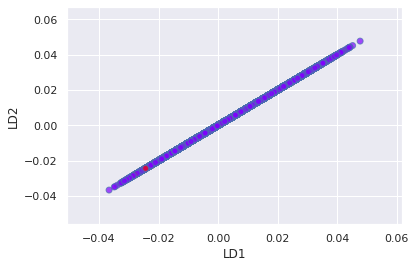

In [4]:
LDA_model.LDA_model(df_train)

In [148]:
# Within Class Scatter Matrix
class_feature_means = pd.DataFrame(columns=[0.0, 1.0])
for c, rows in void_dataset.groupby('Void'):
    class_feature_means[c] = rows.mean()

class_feature_means=class_feature_means.drop(['Void'])

In [137]:
class_feature_means=df_train.groupby('Void').mean()

In [151]:
within_class_scatter_matrix = np.zeros((19,19))
for c, rows in void_dataset.groupby('Void'):
    rows = rows.drop(['Void'], axis=1)   
    s = np.zeros((19,19))

for index, row in rows.iterrows():
    x, mc = row.values.reshape(19,1), class_feature_means[c].values.reshape(19,1)
    s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s

        phi1_right  PHI_right  phi2_right  phi1_left  PHI_left  phi2_left  \
305          2.403      0.369       4.287      0.078     0.473      5.957   
341          5.850      0.894       0.879      0.078     0.473      5.957   
356          0.078      0.473       5.957      5.587     0.991      0.932   
431          5.850      0.894       0.879      2.403     0.369      4.287   
2017         2.275      0.254       3.992      5.511     0.911      0.961   
...            ...        ...         ...        ...       ...        ...   
196230       4.895      0.422       1.825      0.573     0.634      5.168   
196238       5.783      0.683       0.065      5.730     0.685      0.302   
196261       4.895      0.422       1.825      2.106     0.776      4.253   
197030       2.150      0.391       4.388      2.355     0.458      4.207   
197062       2.355      0.458       4.207      2.675     0.358      3.879   

        Misorientation Angle  Mis. X in Right Hand Grain  \
305            

In [85]:
feature_means = X_dataset.mean()
between_class_scatter_matrix = np.zeros((19,19))
for c in class_feature_means:    
    n = len(void_dataset.loc[void_dataset['Void'] == c].index)
    mc, m = class_feature_means[c].values.reshape(19,1), feature_means.values.reshape(19,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

In [86]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [87]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

0.001351911440929381
0.0002919222841996992
2.266412034879627e-06
3.13174090424443e-07
1.7325441709969645e-11
1.732468358631856e-11
1.2197672459287295e-12
1.2197321751626508e-12
1.1123515006253133e-12
1.1123515006253133e-12
5.52108534478692e-17
1.6337082249133387e-17
3.0902531024520434e-18
1.5441946557739648e-18
3.039705544536823e-19
2.090341070848283e-19
5.156164982777498e-20
2.296976010066989e-20
2.296976010066989e-20


In [88]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: -0.8211251887284267
Eigenvector 1: -0.17730801992675252
Eigenvector 2: -0.0013765753832200342
Eigenvector 3: -0.00019021596113414133
Eigenvector 4: -1.0523142391725135e-08
Eigenvector 5: -1.0522681921899056e-08
Eigenvector 6: -7.408633285398021e-10
Eigenvector 7: -7.408420272263111e-10
Eigenvector 8: -6.756210564024811e-10
Eigenvector 9: -6.756210564024811e-10
Eigenvector 10: -3.35340178984455e-14
Eigenvector 11: -9.92283173213579e-15
Eigenvector 12: -1.8769607129185387e-15
Eigenvector 13: -9.379143409601925e-16
Eigenvector 14: -1.8462590916611856e-16
Eigenvector 15: -1.269633242490429e-16
Eigenvector 16: -3.1317561316645735e-17
Eigenvector 17: -1.3951393579998915e-17
Eigenvector 18: -1.3951393579998915e-17


In [89]:
w_matrix = np.hstack((pairs[0][1].reshape(19,1), pairs[1][1].reshape(19,1))).real

In [90]:
X_lda = np.array(X.dot(w_matrix))

In [91]:
le = LabelEncoder()
y = le.fit_transform(void_dataset['Void'])

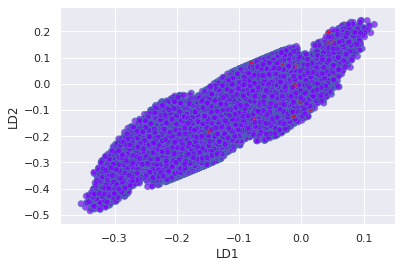

In [92]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [113]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, y_train)

In [114]:
lda.explained_variance_ratio_

array([1.])

IndexError: index 1 is out of bounds for axis 1 with size 1

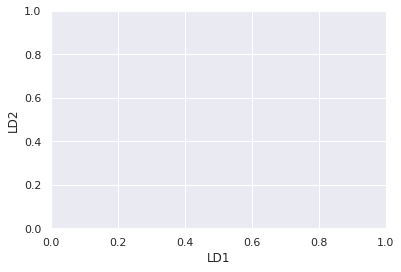

In [115]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)